In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test['SalePrice'] = 0.0

In [4]:
all_data = pd.concat([train, test])

### Initial EDA

In [5]:
all_data.shape

(2919, 81)

In [6]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
all_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


There are too many features\
Is there a model that can make use of this many features? I don't know, when I finish my try I will look to see what other people does \
In my opinion, the first thing is get rid of some features because there are too many

We can start by deleting those features that have 70% or more null values

In [8]:
all_data.shape[0] * 0.5

1459.5

In [9]:
count_miss_val = all_data.isna().sum()
count_miss_val[count_miss_val > 1000].sort_values()

FireplaceQu    1420
MasVnrType     1766
Fence          2348
Alley          2721
MiscFeature    2814
PoolQC         2909
dtype: int64

The null values in the variables with more null's are there because they mean something related to the variable, they are not errors. Therefore we can't delete these variables based on the number of null values

I will do some FE by transforming categorical variables to numbers, so I can do some visualizations like pairplot and heatmap

In [10]:

# Assessing cardinality of categorical (object) variables to identify potential high-cardinality features or unique identifier columns
all_data.select_dtypes(include='object').nunique()[lambda x: x > 5].sort_values()

RoofStyle         6
BsmtFinType2      6
SaleCondition     6
GarageType        6
Heating           6
Foundation        6
BsmtFinType1      6
Functional        7
Condition2        8
RoofMatl          8
HouseStyle        8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [11]:
object_columns = train.select_dtypes(include=['object']).columns

for col in object_columns:
    train[col] = pd.factorize(train[col])[0]

In [12]:
train[object_columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,0,0
1,0,0,-1,0,0,0,1,0,1,1,...,0,0,0,0,0,-1,-1,-1,0,0
2,0,0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,0,0
3,0,0,-1,1,0,0,2,0,2,0,...,1,1,0,0,0,-1,-1,-1,0,1
4,0,0,-1,1,0,0,1,0,3,0,...,0,0,0,0,0,-1,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,-1,0,0,0,0,0,17,0,...,0,0,0,0,0,-1,-1,-1,0,0
1456,0,0,-1,0,0,0,0,0,6,0,...,0,1,0,0,0,-1,0,-1,0,0
1457,0,0,-1,0,0,0,0,0,2,0,...,0,0,0,0,0,-1,2,0,0,0
1458,0,0,-1,0,0,0,0,0,11,0,...,0,1,0,0,0,-1,-1,-1,0,0


In [13]:
train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.011949,-0.010601,-0.033226,-0.008916,-0.000293,-0.024071,0.014769,0.013324,...,0.057044,0.066509,0.005029,-0.014074,-0.006242,0.021172,0.000712,-0.016932,-0.017712,-0.021917
MSSubClass,0.011156,1.000000,0.286937,-0.386347,-0.139781,0.024969,0.179144,-0.115361,-0.018947,-0.022844,...,0.008283,0.010353,-0.080209,-0.016437,-0.007683,-0.013585,-0.021407,0.012874,-0.015047,-0.084284
MSZoning,-0.011949,0.286937,1.000000,-0.248800,-0.161640,0.039678,0.399270,-0.167918,-0.013396,-0.011167,...,-0.029301,-0.027587,-0.074069,-0.029479,-0.021573,0.022231,-0.010621,0.058948,0.068705,-0.116047
LotFrontage,-0.010601,-0.386347,-0.248800,1.000000,0.426095,0.040886,-0.190957,0.231878,0.096766,NaN,...,0.206167,0.219815,0.037457,0.007872,0.003368,0.011200,0.007450,0.006370,0.072517,0.351799
LotArea,-0.033226,-0.139781,-0.161640,0.426095,1.000000,0.197131,-0.083668,0.315484,0.258792,0.010123,...,0.077672,0.093908,-0.030856,0.089707,0.038068,0.001205,-0.014261,-0.013882,0.000199,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.022231,0.011200,0.001205,-0.003690,-0.021453,0.026617,0.063280,-0.051552,...,-0.033737,-0.033227,0.011360,0.019292,-0.006495,1.000000,-0.145721,0.040201,0.054679,0.046432
YrSold,0.000712,-0.021407,-0.010621,0.007450,-0.014261,0.025043,-0.012036,-0.037391,-0.026117,0.023353,...,-0.059689,-0.046232,0.012714,0.043235,0.004906,-0.145721,1.000000,-0.021683,-0.123720,-0.028923
SaleType,-0.016932,0.012874,0.058948,0.006370,-0.013882,0.021171,-0.000025,0.001435,-0.014537,0.057455,...,-0.009887,-0.002809,-0.027036,0.014543,-0.014143,0.040201,-0.021683,1.000000,0.232149,0.072896
SaleCondition,-0.017712,-0.015047,0.068705,0.072517,0.000199,0.022919,0.026551,-0.004773,0.062826,0.019173,...,0.068578,0.071651,-0.032209,-0.047231,-0.032655,0.054679,-0.123720,0.232149,1.000000,0.142503


ME ACABO DE DAR CUENTA, LO DE LA CORRELACIÓN SOLO SIRVE PARA VARIABLES CUANTITATIVAS O CUALITATIVAS ORDINALES (TRAS CONVERTIRLAS A ENTEROS SEGÚN SU ORDEN EN EL CASO DE QUE FUERAN OBJECT), POR LO QUE TENGO QUE SELECCIONAR LAS VARIABLES QUE SEAN ESAS PARA LA CORRELACIÓN, NO LAS OTRAS

In [14]:
train.corr().loc['SalePrice'][lambda x: (x > 0.5) | (x < -0.2)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.265015
Foundation     -0.429678
BsmtFinType1   -0.299343
TotalBsmtSF     0.613581
HeatingQC      -0.427649
CentralAir     -0.251328
Electrical     -0.230830
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
PavedDrive     -0.208954
SalePrice       1.000000
Name: SalePrice, dtype: float64

lets use only the variables that have more correlation to SalePrice

In [20]:
cols_to_use = train.corr().loc['SalePrice'][lambda x: (x > 0.6) | (x < -0.2)].index.to_list()
print(cols_to_use)

['OverallQual', 'ExterQual', 'Foundation', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'PavedDrive', 'SalePrice']


In [21]:
train_c = train[cols_to_use]
train_c

,OverallQual,ExterQual,Foundation,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,GarageCars,GarageArea,PavedDrive,SalePrice
0,7,0,0,0,856,0,0,0,856,1710,2,548,0,208500
1,6,1,1,1,1262,0,0,0,1262,1262,2,460,0,181500
2,7,0,0,0,920,0,0,0,920,1786,2,608,0,223500
3,7,1,2,1,756,1,0,0,961,1717,3,642,0,140000
4,8,0,0,0,1145,0,0,0,1145,2198,3,836,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1,0,2,953,0,0,0,953,1647,2,460,0,175000
1456,6,1,1,1,1542,2,0,0,2073,2073,2,500,0,210000
1457,7,2,5,0,1152,0,0,0,1188,2340,1,252,0,266500
1458,5,1,1,0,1078,1,0,2,1078,1078,1,240,0,142125


1) OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
2) ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
3) Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
4) BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
5) TotalBsmtSF: Total square feet of basement area
6) HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
7) CentralAir: Central air conditioning

       N	No
       Y	Yes
8) Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
9) 1stFlrSF: First Floor square feet
10) GrLivArea: Above grade (ground) living area square feet
11) GarageCars: Size of garage in car capacity
12) GarageArea: Size of garage in square feet
13) PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

We know these variables are correlated with SalePrice.
Now that we have a manageable subset, let's plot a correlation heatmap to identify any variables that are highly correlated with each other and consider removing potential redundancies and multicolinearity

<Axes: >

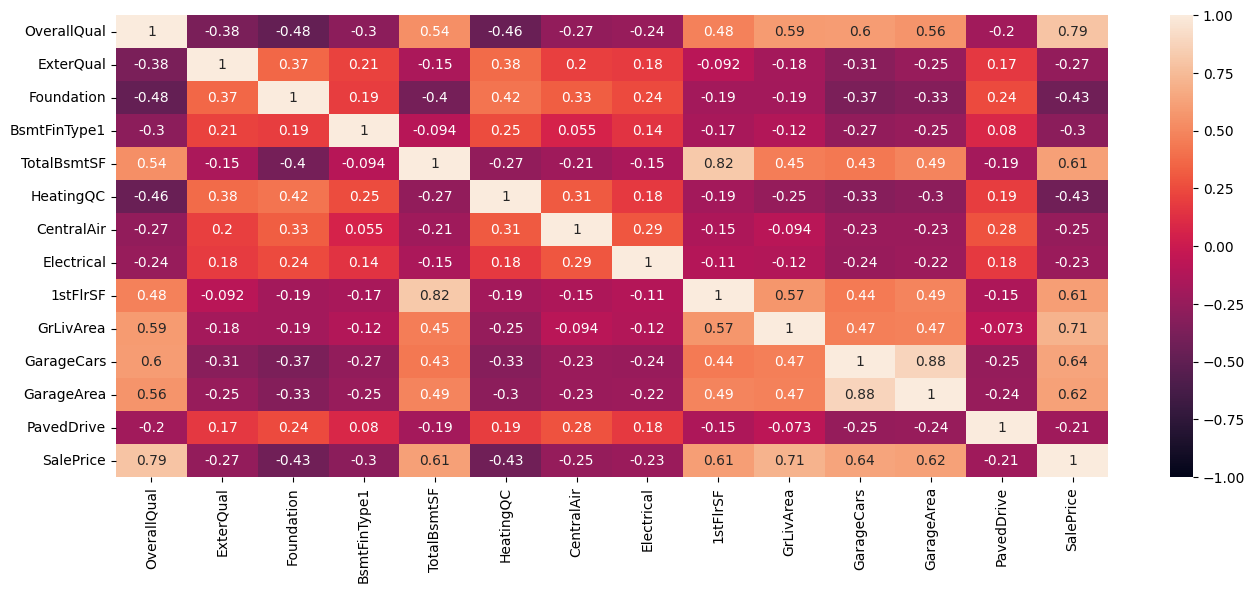

In [25]:
plt.figure(figsize=(16, 6))

sns.heatmap(train_c.corr(), vmin=-1, vmax=1, annot=True)

Many variables show strong correlations with OverallQual, suggesting that it captures information shared by several other features.
Since OverallQual also has the highest correlation with SalePrice, it serves as a strong overall indicator of property value.
To reduce redundancy while preserving predictive power, I will retain OverallQual and select additional variables that have lower correlation with it, ensuring that each contributes unique information to the prediction.

In [30]:
train.corr().loc['OverallQual'][lambda x: (x > -0.3) & (x < 0.2)]

Id              -0.028365
MSSubClass       0.032628
MSZoning        -0.015122
LotArea          0.105806
Street          -0.058823
Alley           -0.026780
LotShape         0.198994
LandContour      0.039133
Utilities       -0.001881
LotConfig        0.060576
LandSlope       -0.066450
Neighborhood    -0.138913
Condition1      -0.019525
Condition2       0.019912
BldgType         0.022988
HouseStyle      -0.178803
OverallCond     -0.091932
RoofStyle        0.092467
RoofMatl         0.033583
Exterior1st     -0.169506
Exterior2nd     -0.222293
ExterCond       -0.139091
BsmtQual        -0.023462
BsmtCond        -0.004801
BsmtFinType1    -0.295514
BsmtFinType2    -0.055033
BsmtFinSF2      -0.059119
Heating         -0.119230
CentralAir      -0.272038
Electrical      -0.243075
LowQualFinSF    -0.030429
BsmtFullBath     0.111098
BsmtHalfBath    -0.040150
BedroomAbvGr     0.101676
KitchenAbvGr    -0.183882
KitchenQual     -0.219938
Functional      -0.157566
GarageType      -0.053224
GarageQual  

In [ ]:
sns.pairplot(train_c[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'PavedDrive']])

,OverallQual,ExterQual,Foundation,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,GarageCars,GarageArea,PavedDrive,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,0.720548,0.726712,1.646575,1057.429452,0.854795,0.065068,0.155479,1162.626712,1515.463699,1.767123,472.980137,0.102740,180921.195890
std,1.382997,0.574763,0.831177,1.534085,438.705324,0.959501,0.246731,0.531210,386.587738,525.480383,0.747315,213.804841,0.365201,79442.502883
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,0.000000,0.000000,0.000000,795.750000,0.000000,0.000000,0.000000,882.000000,1129.500000,1.000000,334.500000,0.000000,129975.000000
50%,6.000000,1.000000,1.000000,2.000000,991.500000,0.000000,0.000000,0.000000,1087.000000,1464.000000,2.000000,480.000000,0.000000,163000.000000
75%,7.000000,1.000000,1.000000,2.000000,1298.250000,2.000000,0.000000,0.000000,1391.250000,1776.750000,2.000000,576.000000,0.000000,214000.000000
max,10.000000,3.000000,5.000000,5.000000,6110.000000,4.000000,1.000000,4.000000,4692.000000,5642.000000,4.000000,1418.000000,2.000000,755000.000000
